In [5]:
from sympy import MatrixSymbol, Matrix, Identity
import sympy as sym
sym.init_printing()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as cl

30.38


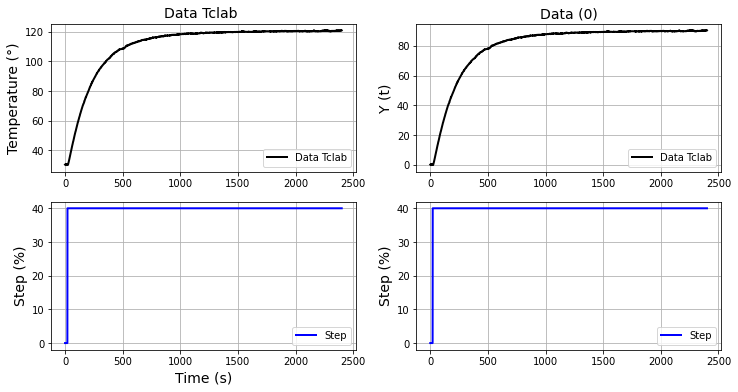

In [6]:
data = np.loadtxt('40.txt',delimiter=',',skiprows=1)
I = 40 

# Zero

Zero = 20

# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T
dt = t1[1]-t1[0]

# Y ---> Zero
Z = y1[Zero]
print(Z)
y2 = y1 - Z

# Iteraciones
N = len(y2)

# Plot
plt.figure(figsize=(12,6))
 
# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Tclab ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data (0)",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()

In [7]:
# Vectors of States

y_1 = np.zeros(N)
y_2 = np.zeros(N)
u_1 = np.zeros(N)
u_2 = np.zeros(N)
    
for k in range(1,N):
    y_1[k]=y2[k-1]
    u_1[k]=u1[k-1]
for k in range(2,N):
    y_2[k]=y2[k-2]
    u_2[k]=u1[k-2]

Ge:  
 -0.003367 z + 0.01672
-----------------------
z^2 - 0.6428 z - 0.3513

dt = 1.0034098625183105



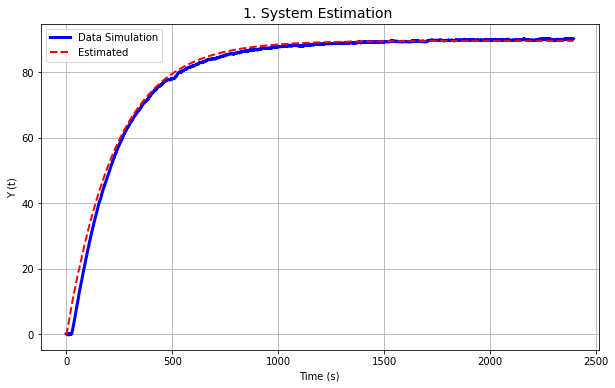

In [8]:
## Phi 
phi = np.array([-y_1,-y_2,u_1,u_2]).transpose()

## Alpha
alpha = 0.9
A = np.dot(phi.T,phi) + alpha*np.eye(len(np.dot(phi.T,phi)))
theta = np.dot(np.linalg.inv(A),np.dot(phi.T,y2))
theta,phi

z = sym.symbols('z', complex=True) # z=Simbolo

#  B(z) / A(z)

A = 1 + theta[0]*z**-1 + theta[1]*z**-2  
B = theta[2]*z**-1 + theta[3]*z**-2


G = B/A
G = G.simplify()
G_e = cl.tf([theta[2], theta[3]],[1, theta[0], theta[1]],dt) 

# Step 
_,ye = cl.step_response(G_e,N)
ye = ye * I

## FT  
print(f"Ge:  {G_e}")

plt.figure(figsize=(10,6))
plt.plot(t1[0:len(ye)],y2[0:len(ye)],'b', linewidth=3, label='Data Simulation')
plt.plot(t1[0:len(ye)],ye[0:len(ye)], 'r--', linewidth=2, label='Estimated')
plt.title("1. System Estimation ",fontsize = 14)
plt.ylabel('Y (t)')
plt.xlabel('Time (s)')
plt.legend(loc= 'best')
plt.grid()
plt.show()


